In [34]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('sample_image.jpg')

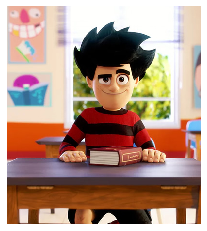

In [35]:
img = img[:,250:650,:]
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

In [36]:
img.shape

(450, 400, 3)

In [37]:
X = img.reshape((-1,3))
print(X.shape)

(180000, 3)


In [38]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
centers = km.cluster_centers_

In [40]:
print(centers)

[[ 39.89175109  25.72367583  22.02324168]
 [225.48505728 206.09599625 184.85216292]
 [154.46669121  57.99973     17.06845852]
 [247.39545551 245.66639616 245.39026886]
 [151.57051329 126.95306436 118.41312148]]


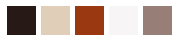

In [41]:
import numpy as np
colors = []
for i,color in enumerate(centers):
    plt.subplot(1,10,i+1)
    colors.append(color)

    square = np.zeros((100,100,3),dtype='uint8')
    square[:,:,:] = color
    plt.imshow(square)
    plt.axis("off")
    
plt.show()
    

In [42]:
np.unique(km.labels_,return_counts=True)

(array([0, 1, 2, 3, 4]),
 array([34662, 49058, 40619, 28345, 27316], dtype=int64))

In [43]:
# Repaint the Original Image
labels = km.labels_

In [44]:
new_img  = np.zeros(X.shape)
for ix in range(X.shape[0]):
    new_img[ix] = colors[labels[ix]]

print(new_img.shape)

(180000, 3)


In [45]:
new_img = new_img.reshape(img.shape)

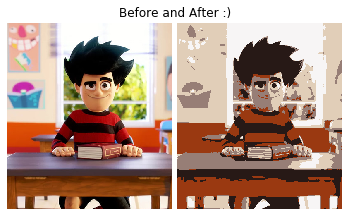

In [46]:
new_img = new_img/255
plt.imshow(np.hstack((img/255,np.ones((450,10,3)),new_img)))
plt.axis("off")
plt.title("Before and After :)")
plt.show()